In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Trực quan hóa dữ liệu

In [ ]:
df.describe()
x = df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
#Checking NaN Variables
nan_check = pd.isnull(df).sum()
nan_check

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Loại bỏ các cột có giá trị thiếu

In [ ]:
# Các cột 'ADDRESSLINE2', 'STATE', 'TERRITORY' chứa quá nhiều giá trị thiếu, loại bỏ chúng
df = df.drop(["ADDRESSLINE2","STATE","TERRITORY"], axis=1)

# Các cột 'PHONE', 'ADDRESSLINE1', 'POSTALCODE' có ý nghĩa quan trọng, giữ lại chúng
df = df.drop(["PHONE","ADDRESSLINE1","POSTALCODE"],axis=1)

# Loại bỏ cột 'ORDERDATE' vì chúng ta đã có 'YEAR ID', 'MONTH ID'
df = df.drop(["ORDERDATE"],axis=1)

# Loại bỏ các cột không cần thiết cho phân tích, bao gồm 'STATUS', 'POSTALCODE', 'CITY',
# 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 'PRODUCTCODE'
drops = ['STATUS', 'CITY','CONTACTFIRSTNAME',
         'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 'PRODUCTCODE']
df = df.drop(drops,axis=1)

df.head(6)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,USA,Medium
5,36,96.66,1,3479.76,4,10,2003,Motorcycles,95,USA,Medium


In [ ]:
df.info()

# Chuẩn hóa các cột không phải dữ liệu số

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Chuẩn hóa các biến phân loại về kiểu số
# Chuẩn hóa PRODUCTLINE
le = LabelEncoder()
df['PRODUCTLINE'] = le.fit_transform(df['PRODUCTLINE'])

# Chuẩn hóa COUNTRY
df['COUNTRY'] = le.fit_transform(df['COUNTRY'])

# Chuẩn hóa DEALSIZE
df['DEALSIZE'] = le.fit_transform(df['DEALSIZE'])

# Chuẩn hóa về cùng độ đo cho các cột
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

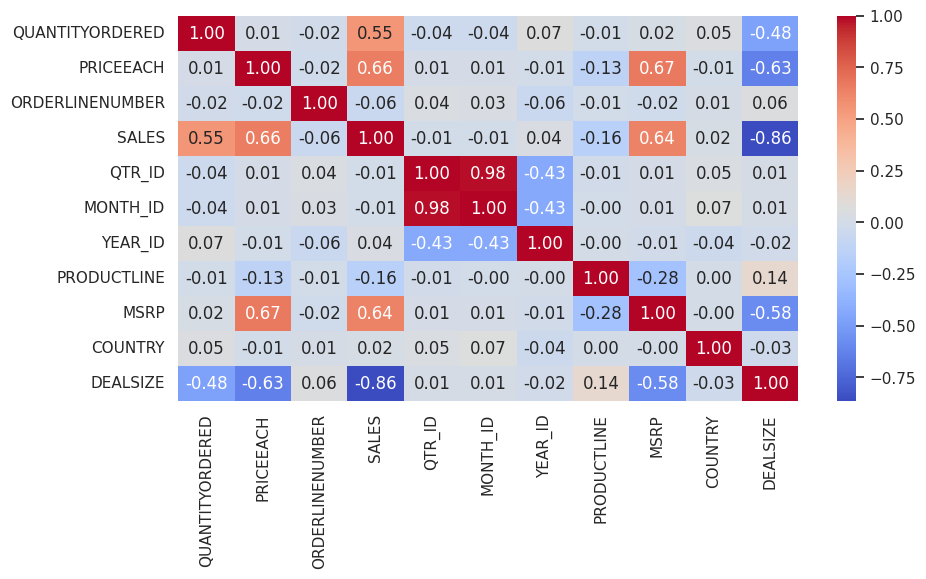

In [ ]:
correlation_matrix = df_scaled.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
from scipy.stats import linregress

# Danh sách cột có thể sử dụng
significant_columns = []

# Danh sách cột cần loại bỏ
columns_to_remove = []

for column in df_scaled.columns:
    slope, intercept, r_value, p_value, std_err = linregress(df_scaled[column], df_scaled['SALES'])
    print(f"{column}: p-value = {p_value}")

    # Chọn ngưỡng p-value, ví dụ: 0.05
    if p_value < 0.05:
        significant_columns.append(column)
    else:
      columns_to_remove.append(column)

# Loại bỏ các cột không cần thiết
df_clear = df.drop(columns=columns_to_remove, axis=1)
df_scaled = df_scaled.drop(columns=columns_to_remove, axis=1)


print(significant_columns)

QUANTITYORDERED: p-value = 2.3595947970383353e-224
PRICEEACH: p-value = 0.0
ORDERLINENUMBER: p-value = 0.0019079479786651267
SALES: p-value = 0.0
QTR_ID: p-value = 0.7181493440103025
MONTH_ID: p-value = 0.6099620561495773
YEAR_ID: p-value = 0.058258123038097895
PRODUCTLINE: p-value = 1.0197912548907545e-17
MSRP: p-value = 6.9526e-319
COUNTRY: p-value = 0.23422144254284116
DEALSIZE: p-value = 0.0
['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'PRODUCTLINE', 'MSRP', 'DEALSIZE']


In [ ]:
df_clear.to_csv('/content/sales_data_sample_clear.csv')
print(df_clear.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   PRODUCTLINE      2823 non-null   int64  
 5   MSRP             2823 non-null   int64  
 6   DEALSIZE         2823 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 154.5 KB
None


# Vẽ biểu đồ phân tán cho các cột

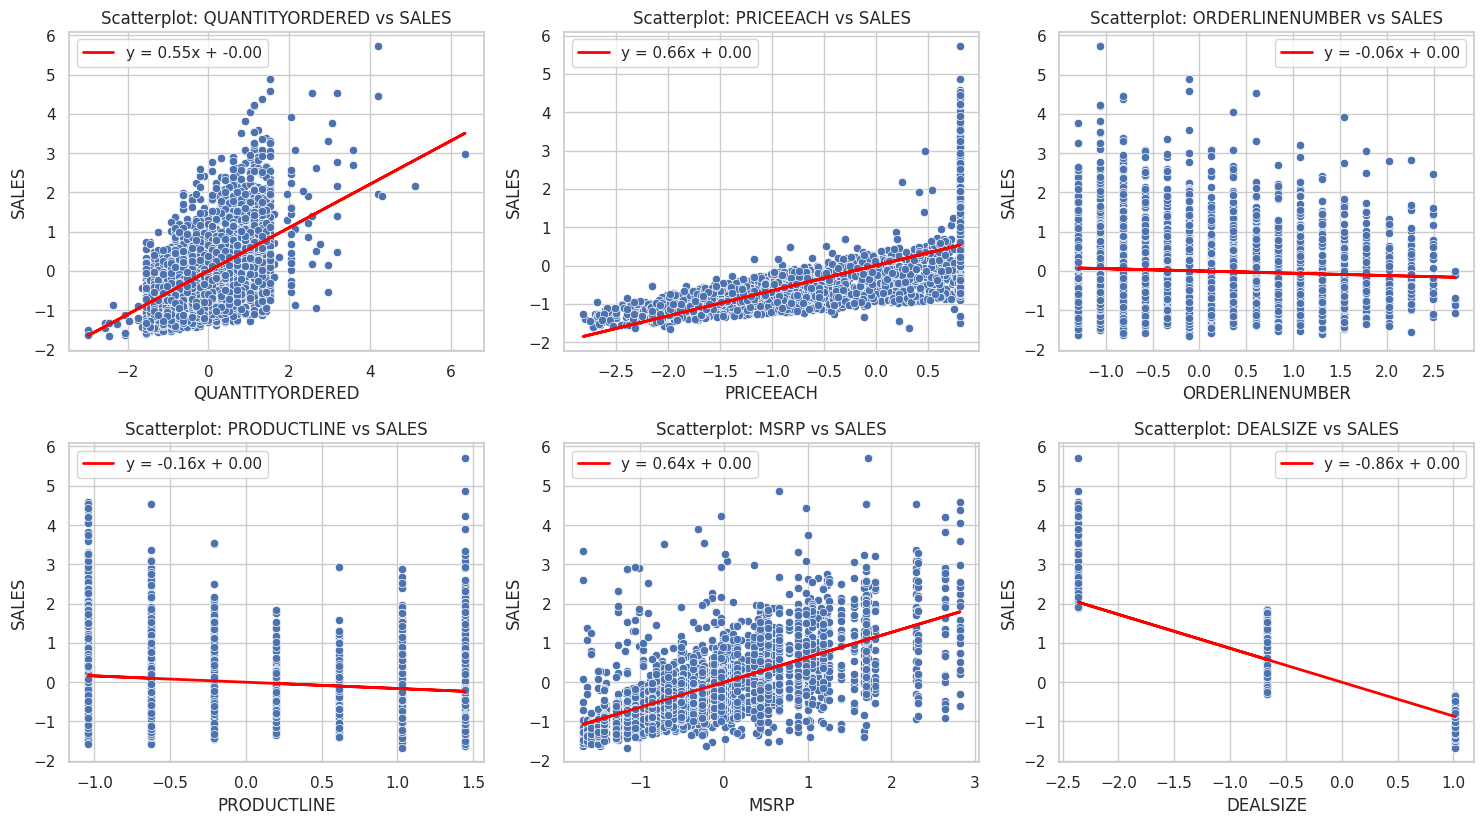

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu cho Seaborn
sns.set(style="whitegrid")

# Kích thước của biểu đồ
plt.figure(figsize=(15, 12))

# Duyệt qua từng cột (loại bỏ cột 'SALES')
columns_to_plot = df_scaled.columns[df_scaled.columns != 'SALES']

# Duyệt qua từng cột và vẽ biểu đồ phân tán so với 'SALES' và in phương trình đường tuyến tính
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=column, y='SALES', data=df_scaled)

    # Tính hệ số tỷ lệ (slope) và chệch (intercept) của đường tuyến tính
    slope, intercept = np.polyfit(df_scaled[column], df_scaled['SALES'], 1)

    # In phương trình đường tuyến tính lên biểu đồ
    plt.plot(df_scaled[column], slope * df_scaled[column] + intercept, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')
    plt.legend()

    plt.title(f'Scatterplot: {column} vs SALES')

# Tự động điều chỉnh khoảng cách giữa subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


# Vẽ biểu đồ đường cho các cột

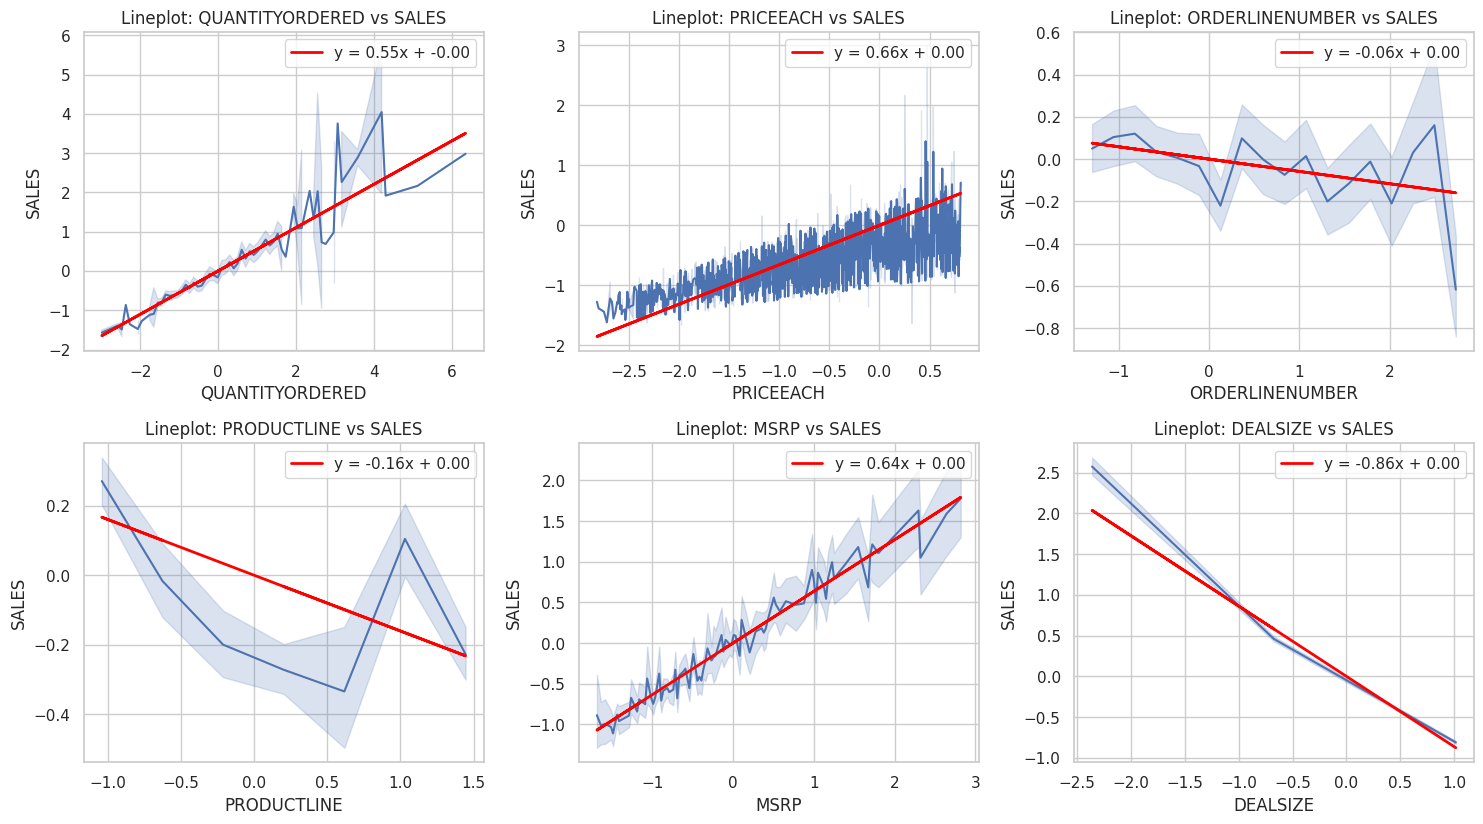

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu cho Seaborn
sns.set(style="whitegrid")

# Lấy danh sách các tên cột (loại bỏ cột 'SALES')
columns_to_plot = df_scaled.columns[df_scaled.columns != 'SALES']

# Kích thước của biểu đồ
plt.figure(figsize=(15, 12))

# Duyệt qua từng cột và vẽ biểu đồ đường và in phương trình đường tuyến tính
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(x=column, y='SALES', data=df_scaled)

    # Tính hệ số tỷ lệ (slope) và chệch (intercept) của đường tuyến tính
    slope, intercept = np.polyfit(df_scaled[column], df_scaled['SALES'], 1)

    # In phương trình đường tuyến tính lên biểu đồ
    plt.plot(df_scaled[column], slope * df_scaled[column] + intercept, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')
    plt.legend()

    plt.title(f'Lineplot: {column} vs SALES')

# Tự động điều chỉnh khoảng cách giữa subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


# Vẽ biểu đồ Box cho các cột

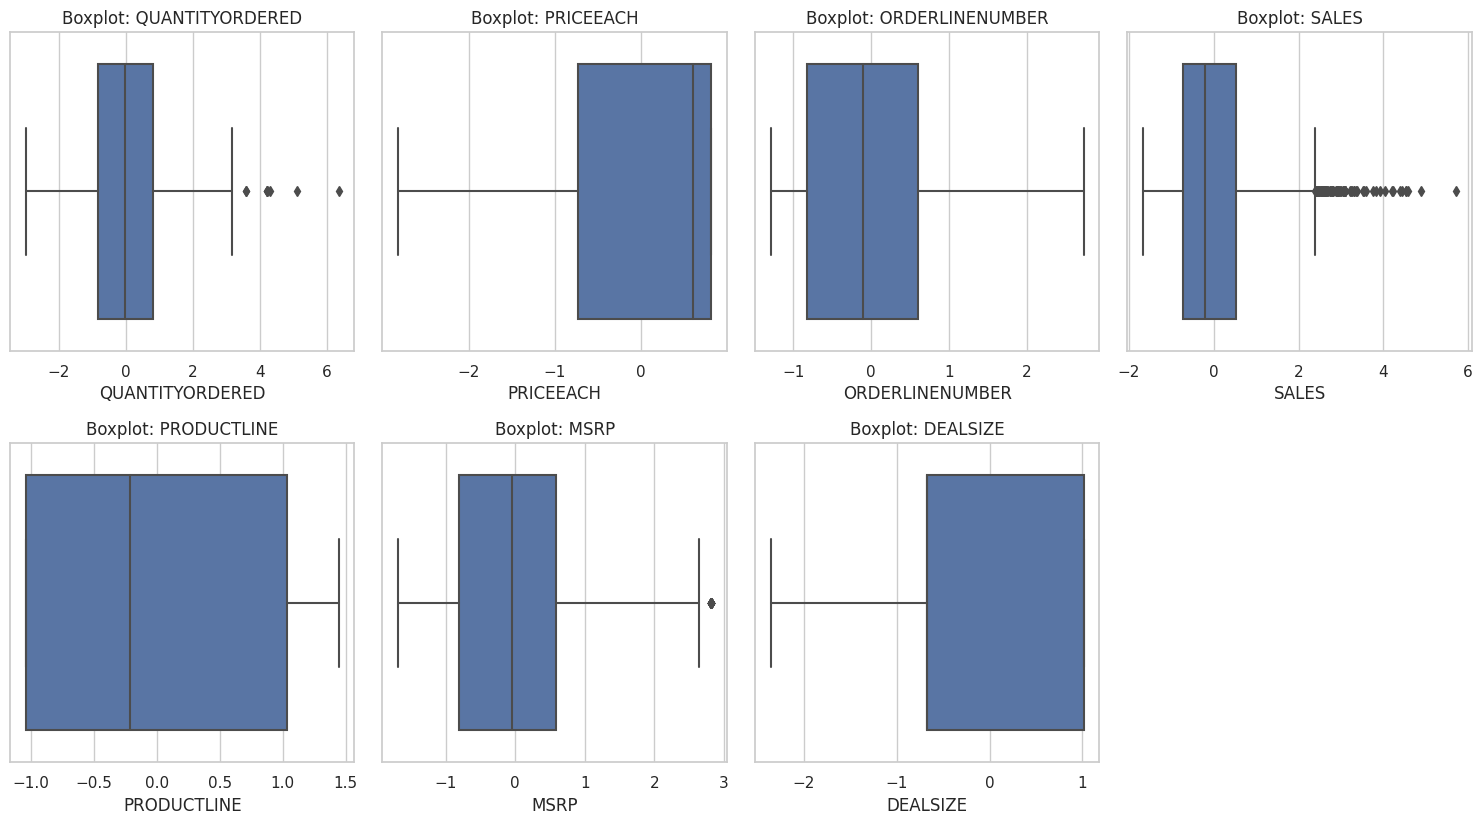

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu cho Seaborn
sns.set(style="whitegrid")

# Số lượng cột
num_cols = len(df_scaled.columns)

# Kích thước của biểu đồ
plt.figure(figsize=(15, 12))

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(df_scaled.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_scaled[column])
    plt.title(f'Boxplot: {column}')

# Tự động điều chỉnh khoảng cách giữa subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_scaled.drop('SALES', axis=1)
y = df_scaled['SALES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.to_csv('/content/test.csv')

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.22314551759988357
R-squared: 0.8266289338929778


In [ ]:
import joblib

# Lưu mô hình vào file
model_filename = '/content/linear_model.joblib'
joblib.dump(model, model_filename)

# Load mô hình từ file
loaded_model = joblib.load(model_filename)


In [ ]:
# Đường dẫn đến file model.joblib
model_path = "/content/linear_model.joblib"

# Tải mô hình từ file
loaded_model = joblib.load(model_path)

# Hiển thị thông tin của mô hình
print("Model Information:")
print(loaded_model)

# Lấy hệ số của mô hình
coefficients = loaded_model.coef_

# Lấy chệch của mô hình
intercept = loaded_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Model Information:
LinearRegression()
Coefficients: [ 0.35317269  0.26157696 -0.01137793 -0.01503549  0.21221364 -0.38452935]
Intercept: -0.011507900958796627
